# PROJET 5 - SEGMENTATION DE CLIENTS D'UN SITE DE E-COMMERCE
## ANALYSE EXPLORATOIRE DES DONNEES
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#On importe notre jeu de données

data = pd.read_csv('data/data_clients_satisfaction')

In [3]:
data.head()

,id,cp,ville,etat,montant,date,satisfaction,nb_achats
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,141.90,2018-05-10 10:56:27,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,27.19,2018-05-07 11:11:27,4.0,1
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,86.22,2017-03-10 21:05:03,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,43.62,2017-10-12 20:29:41,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,196.89,2017-11-14 19:45:42,5.0,1


In [4]:
data.shape

(94721, 8)

In [5]:
data.dtypes

id               object
cp                int64
ville            object
etat             object
montant         float64
date             object
satisfaction    float64
nb_achats         int64
dtype: object

In [6]:
data.describe()

,cp,montant,satisfaction,nb_achats
count,94721.000000,94721.000000,94721.000000,94721.000000
mean,35220.408537,146.689773,4.102202,1.186347
std,29824.709455,198.336390,1.326758,0.646716
min,1003.000000,6.080000,1.000000,1.000000
25%,11410.000000,57.510000,4.000000,1.000000
50%,24445.000000,96.350000,5.000000,1.000000
75%,59068.000000,163.250000,5.000000,1.000000
max,99990.000000,6929.310000,5.000000,24.000000


In [7]:
data.isna().mean()

id              0.0
cp              0.0
ville           0.0
etat            0.0
montant         0.0
date            0.0
satisfaction    0.0
nb_achats       0.0
dtype: float64

In [8]:
data.dtypes

id               object
cp                int64
ville            object
etat             object
montant         float64
date             object
satisfaction    float64
nb_achats         int64
dtype: object

In [9]:
#On change le type de 'date' pour que ce soit considérer comme une date puis on utilie timestamp

data['date'] = pd.to_datetime(data['date'])
data['timestamp'] = data['date'].apply(lambda x : datetime.timestamp(x)).astype(int)


#Enfin, on change cela en jour en prenant la date la plus récente en référence
data['recence'] = (data['timestamp'].max() - data['timestamp']) / (24*3600)

In [10]:
#On arrondit

data['recence'] = data['recence'].round(2)

In [11]:
data.head()

,id,cp,ville,etat,montant,date,satisfaction,nb_achats,timestamp,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,141.90,2018-05-10 10:56:27,5.0,1,1525942587,115.92
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,27.19,2018-05-07 11:11:27,4.0,1,1525684287,118.91
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,86.22,2017-03-10 21:05:03,3.0,1,1489176303,541.46
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,43.62,2017-10-12 20:29:41,4.0,1,1507832981,325.53
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,196.89,2017-11-14 19:45:42,5.0,1,1510685142,292.51


In [12]:
#On pose nos variables

features = ['montant', 'nb_achats', 'recence']
features_rs = ['montant', 'nb_achats', 'recence', 'satisfaction']

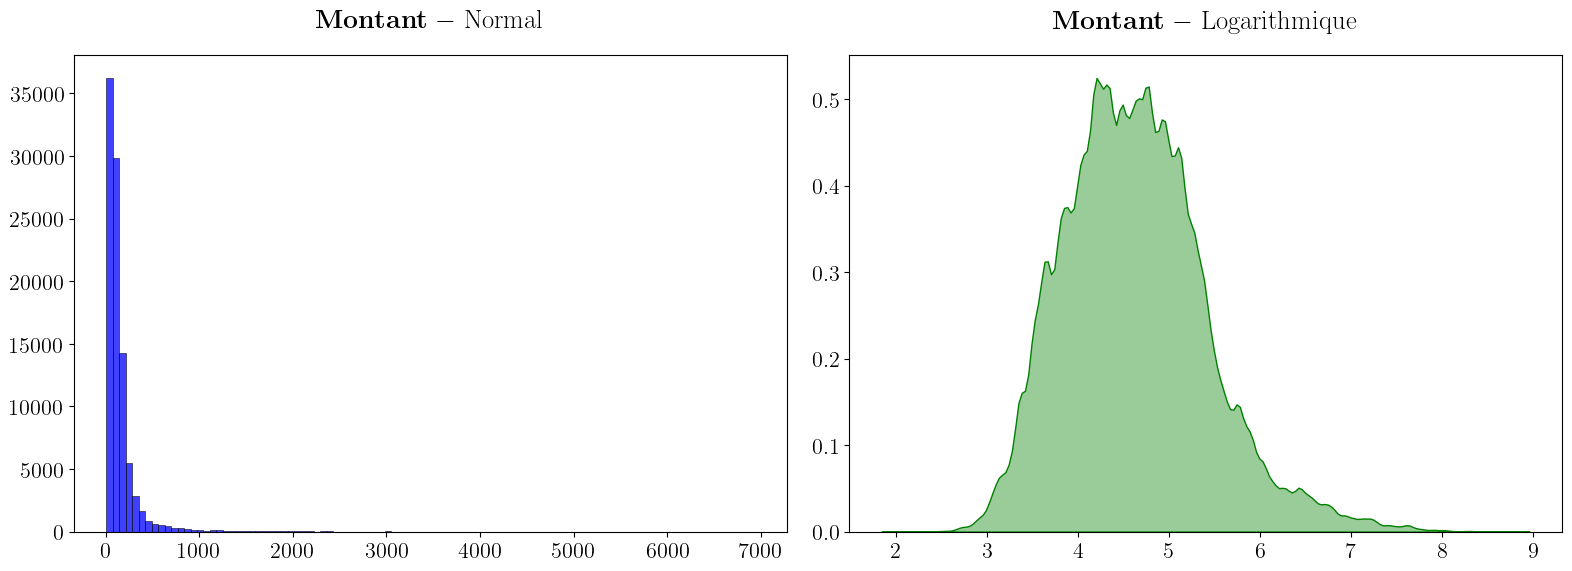

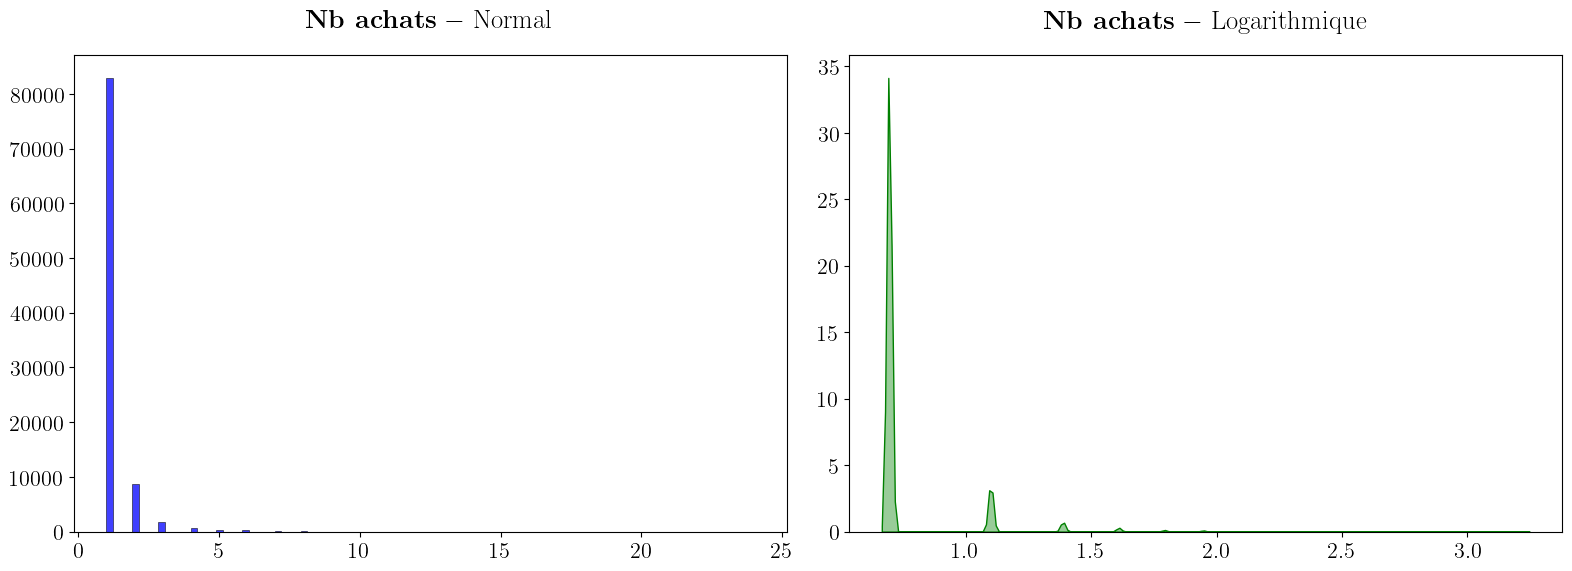

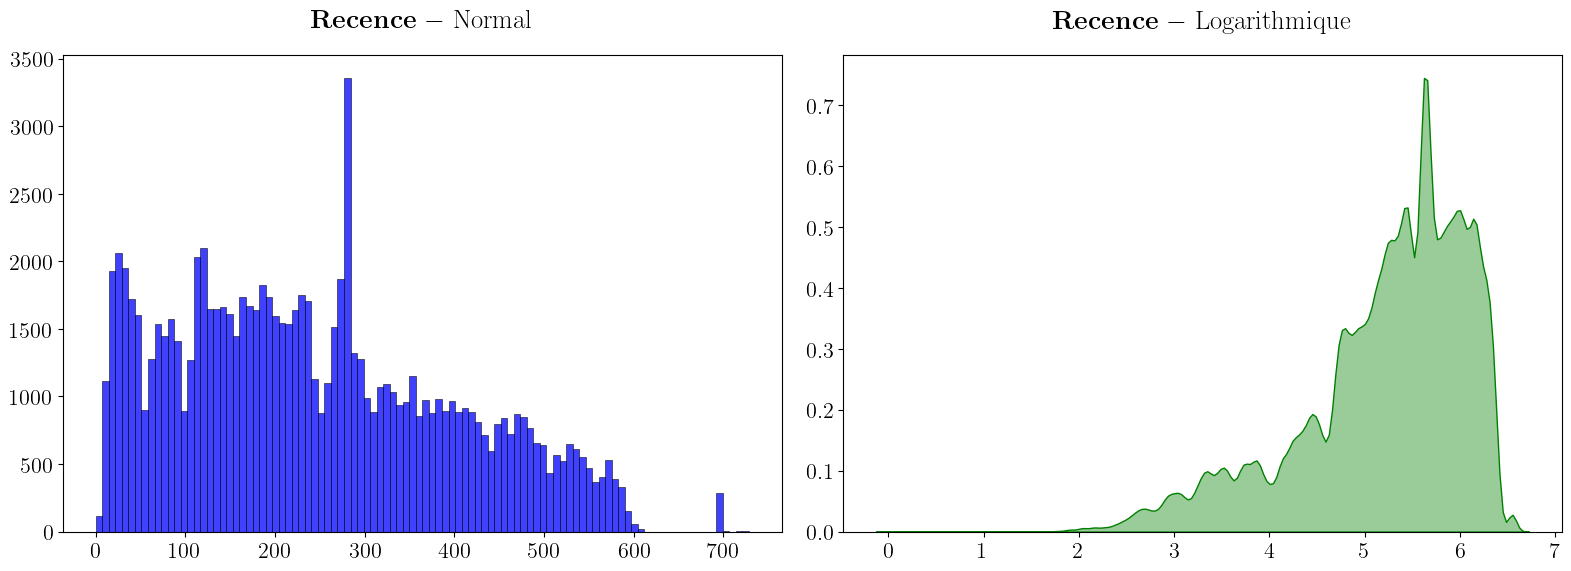

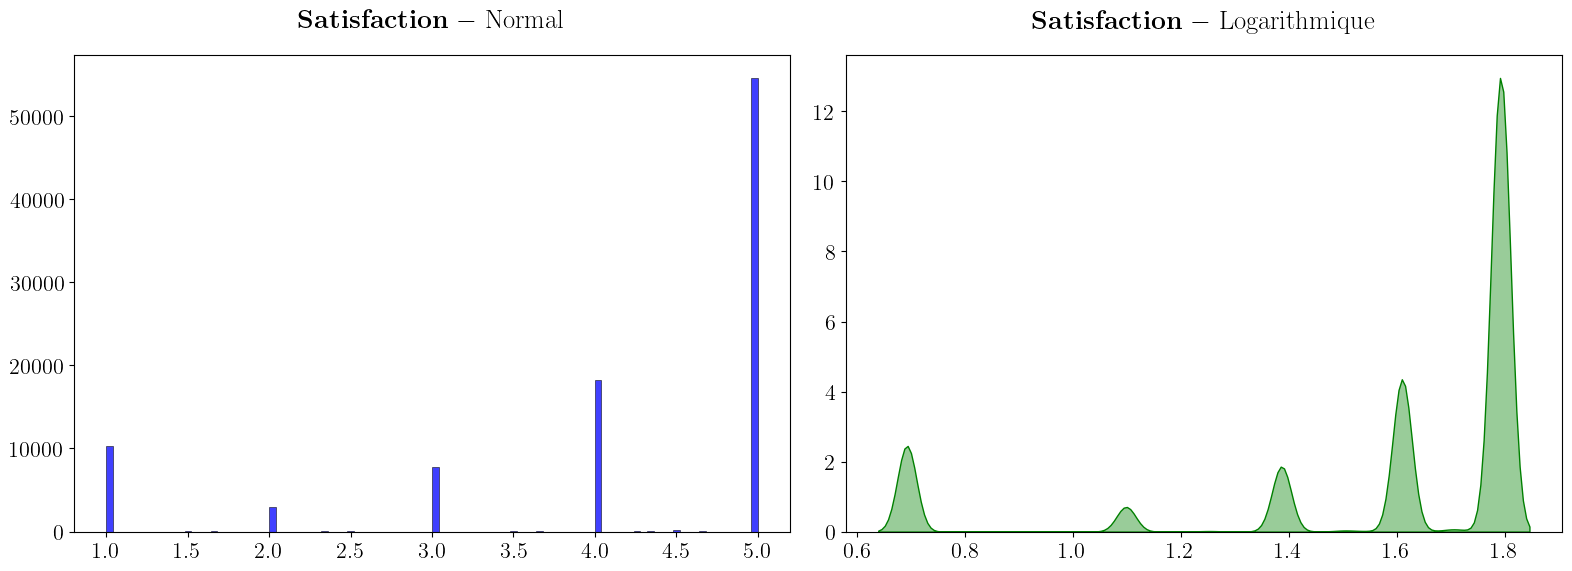

In [13]:
#On affiche les distributions de nos variables

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)


for feature in features_rs:
    fig, axes = plt.subplots(1,2, figsize = (16,6), gridspec_kw={'width_ratios':[1,1]})
    # Sélectionner les données de la feature
    x = data[feature]
    
    # Plot du subplot de gauche (distribution normale)
    sns.histplot(data=x, color='blue', ax=axes[0], bins = 100)
    axes[0].set_title(f"\\textbf{{{feature.capitalize().replace('_',' ')}}} $-$ Normal", pad=20)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    
    # Plot du subplot de droite (transformation logarithmique)
    transformed_x = (x + 1).apply(np.log)
    sns.kdeplot(data=transformed_x, fill=True, alpha=0.4, bw_adjust=0.5, color='green', ax=axes[1])
    axes[1].set_title(f"\\textbf{{{feature.capitalize().replace('_',' ')}}} $-$ Logarithmique", pad=20)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    # Ajuster l'espacement entre les subplots
    plt.tight_layout()
    
    plt.savefig(f"dist_{feature.replace('_','')}.pdf", bbox_inches='tight')
    # Afficher les subplots
    plt.show()

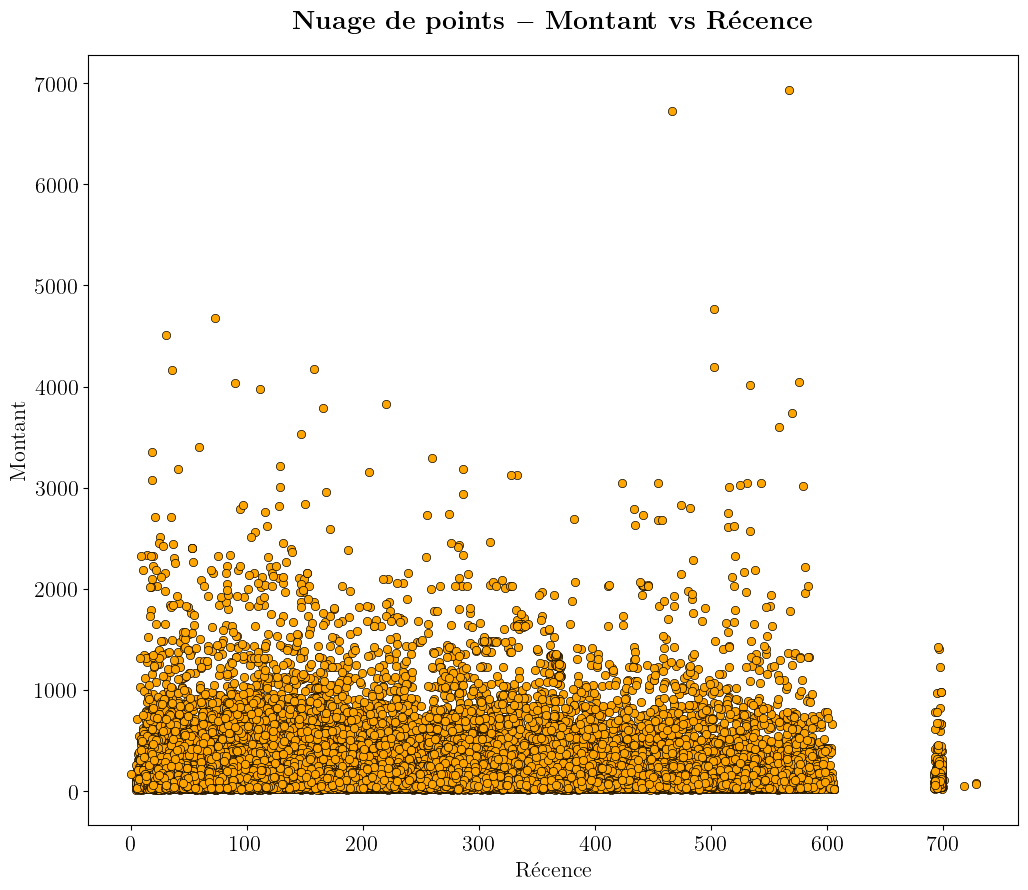

In [14]:
#Nuage de points montant vs recence

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['recence'], y = data['montant'], color = 'orange', edgecolor = 'black')
plt.xlabel('Récence')
plt.ylabel('Montant')
plt.title(f"\\textbf{{Nuage de points $-$ Montant vs Récence}}", pad = 20)
plt.savefig(f"scatter_montant_vs_recence.pdf", bbox_inches='tight')
plt.show()

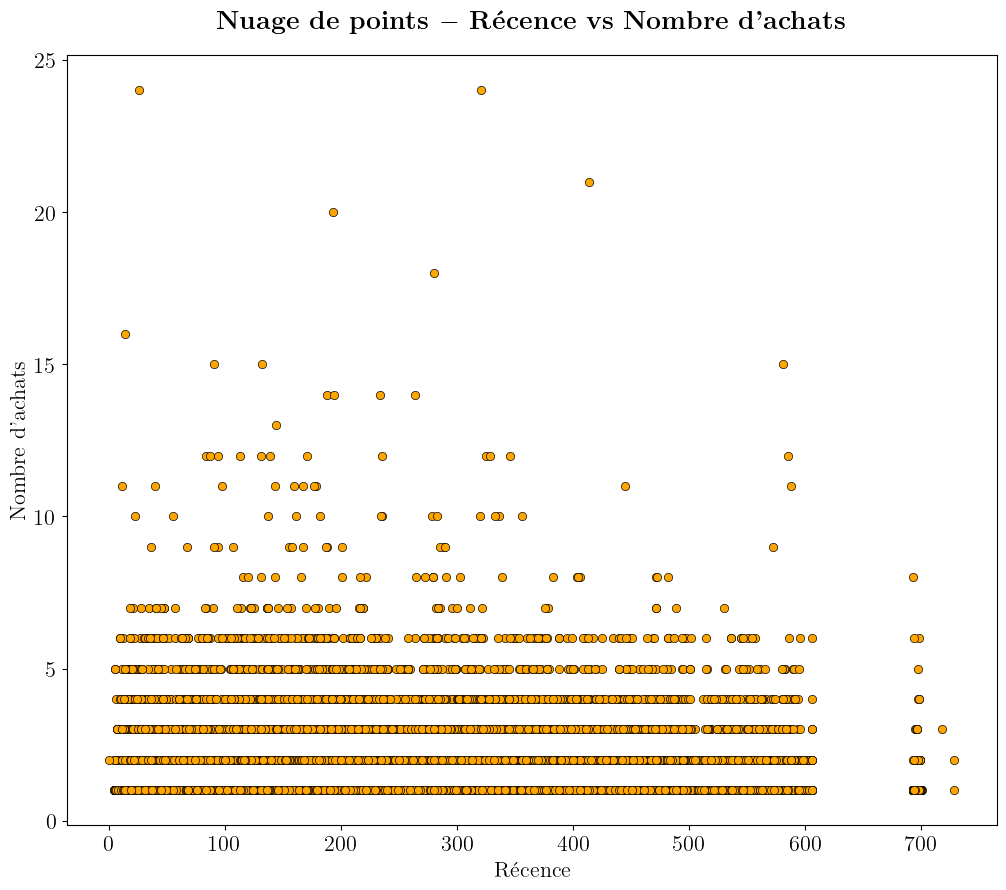

In [15]:
#Nuage de points recence vs nb_achats

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['recence'], y = data['nb_achats'], color = 'orange', edgecolor = 'black')
plt.xlabel('Récence')
plt.ylabel("Nombre d'achats")
plt.title(f"\\textbf{{Nuage de points $-$ Récence vs Nombre d'achats}}", pad = 20)
plt.savefig(f"scatter_recence_vs_nbachats.pdf", bbox_inches='tight')
plt.show()

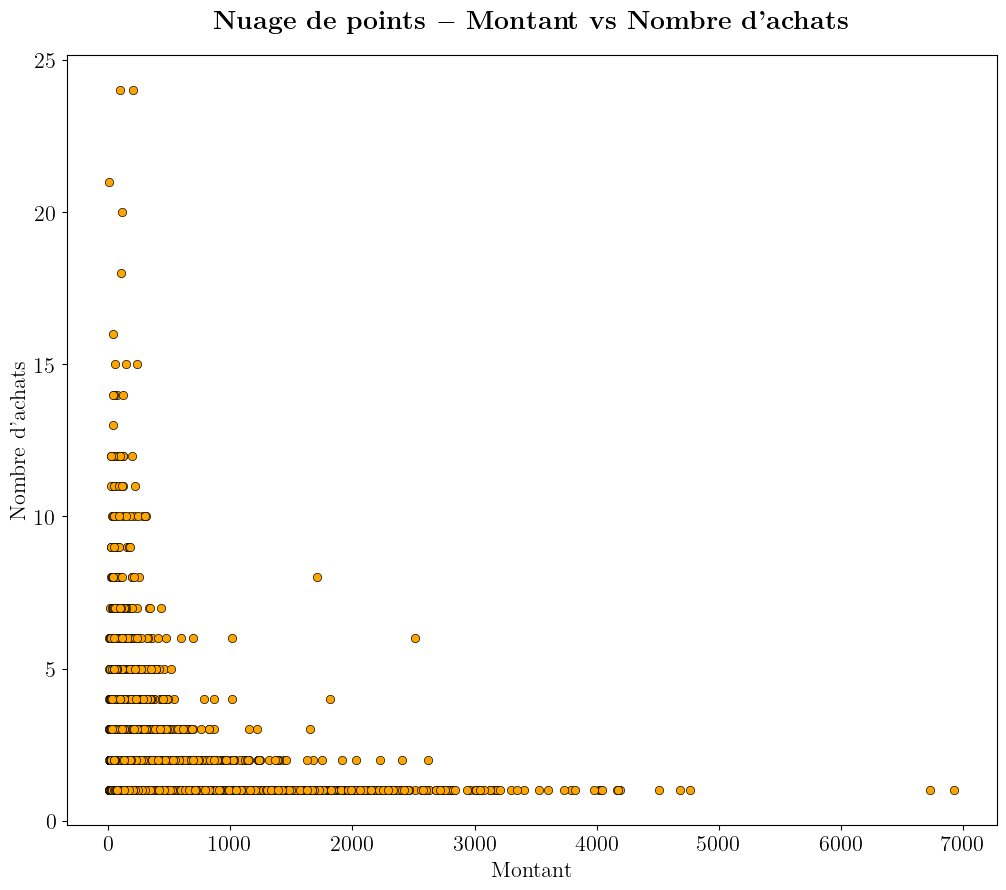

In [16]:
#Nuage de points montant vs nb_achats

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['montant'], y = data['nb_achats'], color = 'orange', edgecolor = 'black')
plt.xlabel('Montant')
plt.ylabel("Nombre d'achats")
plt.title(f"\\textbf{{Nuage de points $-$ Montant vs Nombre d'achats}}", pad = 20)
plt.savefig(f"scatter_montant_vs_nbachats.pdf", bbox_inches='tight')
plt.show()

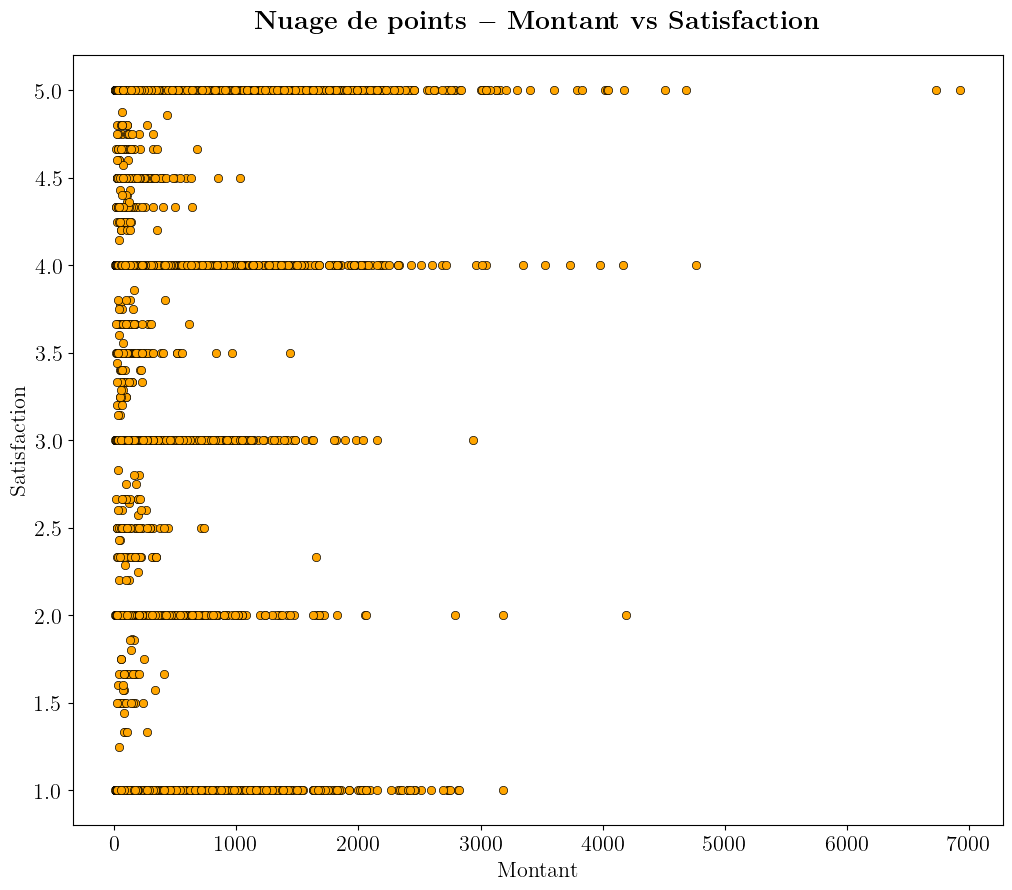

In [17]:
#Nuage de points montant vs satisfaction

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['montant'], y = data['satisfaction'], color = 'orange', edgecolor = 'black')
plt.xlabel('Montant')
plt.ylabel("Satisfaction")
plt.title(f"\\textbf{{Nuage de points $-$ Montant vs Satisfaction}}", pad = 20)
plt.savefig(f"scatter_montant_vs_satisfaction.pdf", bbox_inches='tight')
plt.show()

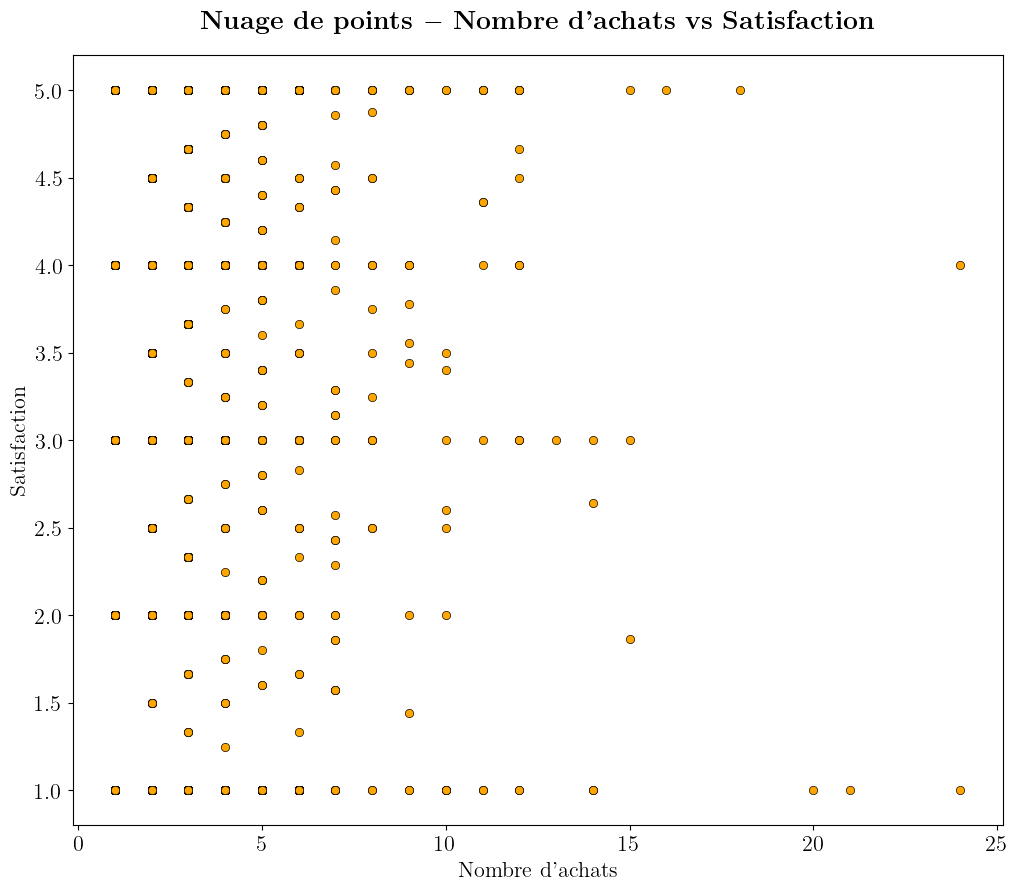

In [18]:
#Nuage de points nb_achats vs satisfaction

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['nb_achats'], y = data['satisfaction'], color = 'orange', edgecolor = 'black')
plt.xlabel("Nombre d'achats")
plt.ylabel("Satisfaction")
plt.title(f"\\textbf{{Nuage de points $-$ Nombre d'achats vs Satisfaction}}", pad = 20)
plt.savefig(f"scatter_nbachats_vs_satisfaction.pdf", bbox_inches='tight')
plt.show()

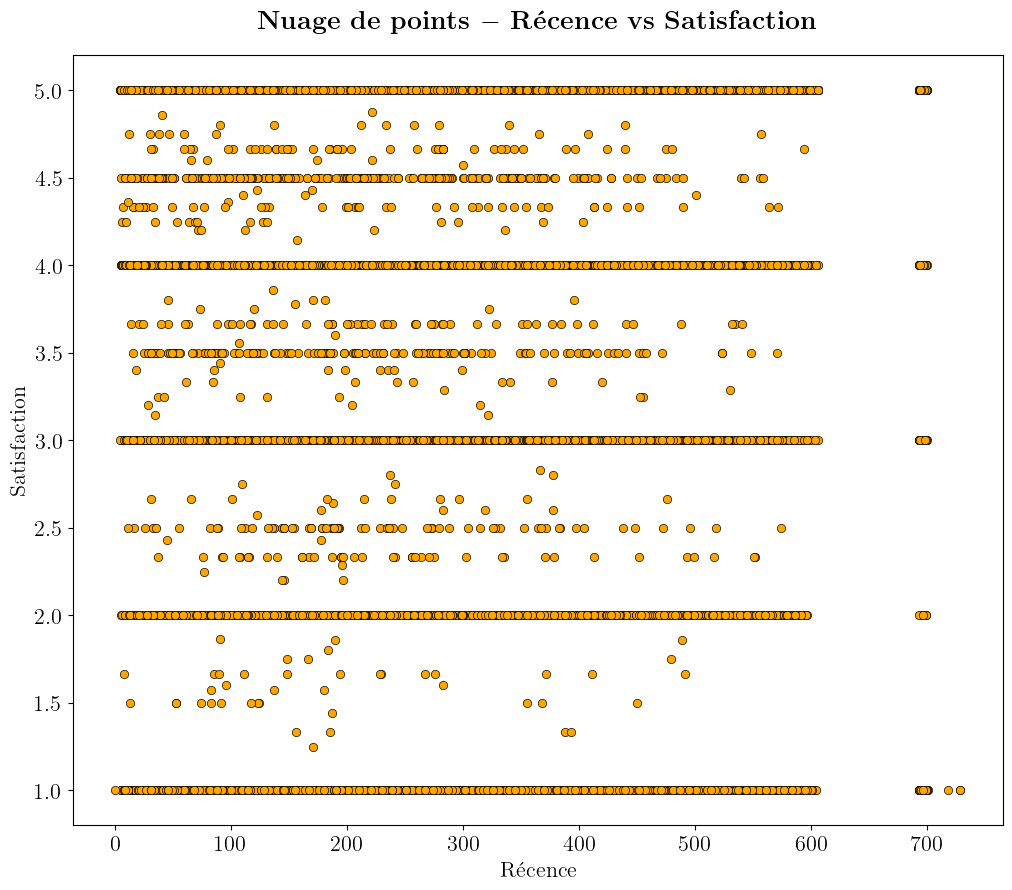

In [19]:
#Nuage de points recence vs satisfaction

plt.figure(figsize=(12,10))
sns.scatterplot(x = data['recence'], y = data['satisfaction'], color = 'orange', edgecolor = 'black')
plt.xlabel("Récence")
plt.ylabel("Satisfaction")
plt.title(f"\\textbf{{Nuage de points $-$ Récence vs Satisfaction}}", pad = 20)
plt.savefig(f"scatter_satisfaction_vs_recence.pdf", bbox_inches='tight')
plt.show()

In [13]:
#on sauvegarde notre data pour les essais segmentation

data[features_rs].to_csv('data/data_clients_rs', index = False)